In [11]:
def MBTI(input):
    tokenize = build_bag_of_words_features_filtered(input)
    ie = IntroExtro.classify(tokenize)
    Is = IntuitionSensing.classify(tokenize)
    tf = ThinkingFeeling.classify(tokenize)
    jp = JudgingPercieiving.classify(tokenize)
    
    mbt = ''
    
    if(ie == 'introvert'):
        mbt+='I'
    if(ie == 'extrovert'):
        mbt+='E'
    if(Is == 'Intuition'):
        mbt+='N'
    if(Is == 'Sensing'):
        mbt+='S'
    if(tf == 'Thinking'):
        mbt+='T'
    if(tf == 'Feeling'):
        mbt+='F'
    if(jp == 'Judging'):
        mbt+='J'
    if(jp == 'Percieving'):
        mbt+='P'
    return(mbt)
    

In [12]:
def tellmemyMBTI(input, name, traasits=[]):
    a = []
    trait1 = pd.DataFrame([0,0,0,0],['I','N','T','J'],['count'])
    trait2 = pd.DataFrame([0,0,0,0],['E','S','F','P'],['count'])
    for i in input:
        a += [MBTI(i)]
    for i in a:
        for j in ['I','N','T','J']:
            if(j in i):
                trait1.loc[j]+=1                
        for j in ['E','S','F','P']:
            if(j in i):
                trait2.loc[j]+=1 
    trait1 = trait1.T
    trait1 = trait1*100/len(input)
    trait2 = trait2.T
    trait2 = trait2*100/len(input)
    
    
    #Finding the personality
    YourTrait = ''
    for i,j in zip(trait1,trait2):
        temp = max(trait1[i][0],trait2[j][0])
        if(trait1[i][0]==temp):
            YourTrait += i  
        if(trait2[j][0]==temp):
            YourTrait += j
    traasits +=[YourTrait] 
    
    #Plotting
    
    labels = np.array(results.columns)

    intj = trait1.loc['count']
    ind = np.arange(4)
    width = 0.4
    fig = plt.figure()
    ax = fig.add_subplot(111)
    rects1 = ax.bar(ind, intj, width, color='royalblue')

    esfp = trait2.loc['count']
    rects2 = ax.bar(ind+width, esfp, width, color='seagreen')

    fig.set_size_inches(10, 7)
    
    

    ax.set_xlabel('Finding the MBTI Trait', size = 18)
    ax.set_ylabel('Trait Percent (%)', size = 18)
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(labels)
    ax.set_yticks(np.arange(0,105, step= 10))
    ax.set_title('Your Personality is '+YourTrait,size = 20)
    plt.grid(True)
    
    
    fig.savefig(name+'.png', dpi=200)
    
    plt.show()
    return(traasits)
        

In [13]:
with open("Myquora.txt", 'rb') as f:
     my_writing = [l.decode('utf8', 'ignore') for l in f.readlines()]


In [14]:
my_posts = my_writing[0].split('|||')
len(my_posts)
#my_posts

38

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import string
from nltk.classify import NaiveBayesClassifier
temp = {'train' : [81.12443979837917,70.14524215640667,80.03456948570128,79.79341109742592], 'test' : [58.20469312585358,54.46262259027357,59.41315234035509,54.40549600629061]}
results = pd.DataFrame.from_dict(temp, orient='index', columns=['Introvert - Extrovert', 'Intuition - Sensing', 'Thinking - Feeling', 'Judging - Percieiving'])


In [16]:
useless_words = nltk.corpus.stopwords.words("english") + list(string.punctuation)
def build_bag_of_words_features_filtered(words):
    words = nltk.word_tokenize(words)
    return {
        word:1 for word in words \
        if not word in useless_words}

In [18]:
import pickle
f = open('IntroExtronew.pickle', 'rb')
IntroExtro = pickle.load(f)
f.close()
print('1')
f= open('IntuitionSensingnew.pickle', 'rb')
IntuitionSensing = pickle.load(f)
f.close()
print('2')

f= open('ThinkingFeelingnew.pickle', 'rb')
ThinkingFeeling = pickle.load(f)
f.close()
print('3')

    
    
f = open('JudgingPercieivingnew.pickle', 'rb')
JudgingPercieiving = pickle.load(f)
f.close()
print('4')



1
2
3
4


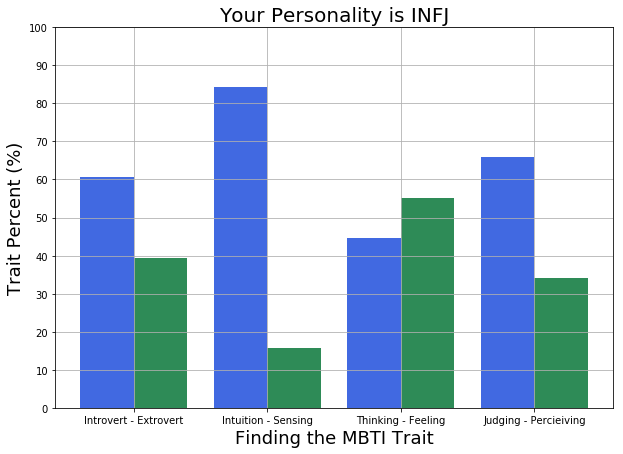

In [19]:
trait=tellmemyMBTI(my_posts, 'Divy')


In [33]:
with open("Sanayapoem.txt", 'rb') as f:
     my_writing = [l.decode('utf8', 'ignore') for l in f.readlines()]

In [34]:
my_posts = my_writing[0].split('|||')
len(my_posts)
#my_posts

11

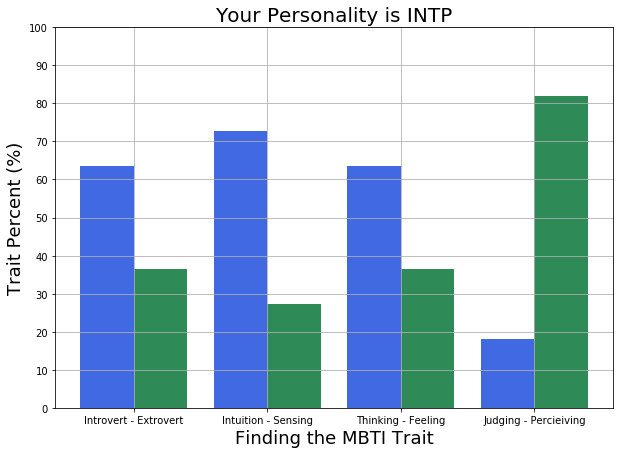

In [35]:
trait = tellmemyMBTI(my_posts,'sanaya')